In [562]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,recall_score



In [563]:
BASE_DIR = Path.cwd()          # ml/
DATA_DIR = BASE_DIR.parent / "data"

def load_csv(name):
    return pd.read_csv(DATA_DIR / f"{name}.csv")


Data

In [564]:
orders=load_csv("order_level")
fact=load_csv("fact")
products=load_csv("dim_products")

In [565]:
fact['seller_id'].describe()

count                               109132
unique                                2962
top       6560211a19b47992c3666cc44a7e94c0
freq                                  1978
Name: seller_id, dtype: object

In [566]:
fact=fact.merge(products[['product_id','product_category_name']],on='product_id',how='left')
fact.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery_time,has_review,super_late,high_price,high_delivery_cost,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00,7.61,True,False,False,False,cool stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00,16.22,True,False,True,False,pet shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00,7.95,True,False,True,False,Furniture
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00,6.15,True,False,False,False,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00,25.11,True,False,True,False,garden tools


In [567]:
fact['order_id'].describe()

count                               109132
unique                               95371
top       5a3b1c29a49756e75f1ef513383c0c12
freq                                    22
Name: order_id, dtype: object

In [568]:
#fact=fact.merge(products[['product_id','product_category_name']],on="product_id")

In [569]:
fact.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery_time,has_review,super_late,high_price,high_delivery_cost,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00,7.61,True,False,False,False,cool stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00,16.22,True,False,True,False,pet shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00,7.95,True,False,True,False,Furniture
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00,6.15,True,False,False,False,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00,25.11,True,False,True,False,garden tools


In [570]:
fact.groupby(['order_id','seller_id'])['delivery_time'].nunique().max()


np.int64(1)

In [571]:
new=fact.groupby(['order_id','seller_id']).agg({
    'price':'sum',
    'delivery_cost':'sum',
    'product_category_name':'first',
    'order_purchase_timestamp':'first',
    'delivery_time':'first'
})
new=new.reset_index()
new

,order_id,seller_id,price,delivery_cost,product_category_name,order_purchase_timestamp,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool stuff,2017-09-13 08:59:02,7.61
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet shop,2017-04-26 10:53:06,16.22
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Furniture,2018-01-14 14:33:31,7.95
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,2018-08-08 10:00:35,6.15
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden tools,2017-02-04 13:57:51,25.11
...,...,...,...,...,...,...,...
96681,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,housewares,2018-04-23 13:57:06,17.37
96682,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,350.00,36.53,computers accessories,2018-07-14 10:26:46,9.42
96683,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,sports leisure,2017-10-23 17:07:56,4.80
96684,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,computers accessories,2017-08-14 23:02:59,1.96


In [572]:
new.duplicated(['order_id','seller_id']).any()


np.False_

In [573]:

new['seller_id'].describe()

count                                96686
unique                                2962
top       6560211a19b47992c3666cc44a7e94c0
freq                                  1801
Name: seller_id, dtype: object

In [574]:
new.duplicated(['seller_id','order_id']).any()

np.False_

In [575]:
#new['is_late']=np.where(new['delivery_time']>15,1,0)
#new['is_late']=new['delivery_time'].map(lambda x : 1 if x >15 else 0)
new['is_late']=(new['delivery_time']>15).astype(int)

In [576]:
new.head()

,order_id,seller_id,price,delivery_cost,product_category_name,order_purchase_timestamp,delivery_time,is_late
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool stuff,2017-09-13 08:59:02,7.61,0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet shop,2017-04-26 10:53:06,16.22,1
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Furniture,2018-01-14 14:33:31,7.95,0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,2018-08-08 10:00:35,6.15,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden tools,2017-02-04 13:57:51,25.11,1


In [577]:
# check the propostions of late orders
new['is_late'].value_counts(normalize=True)*100


is_late
0    73.018845
1    26.981155
Name: proportion, dtype: float64

In [578]:
new['product_category_name'].value_counts()

product_category_name
bed bath table                                   9258
health beauty                                    8580
Furniture                                        8042
sports leisure                                   7487
computers accessories                            6525
housewares                                       5733
watches gifts                                    5479
telephony                                        4087
auto                                             3806
toys                                             3766
cool stuff                                       3527
garden tools                                     3416
perfumery                                        3084
baby                                             2787
electronics                                      2501
Fashion                                          2336
stationery                                       2253
pet shop                                         1702
luggag

In [579]:
# consider only top categories and set others are 'others'

top_categories=new['product_category_name'].value_counts().nlargest(18).index

new['product_category_name']=new['product_category_name'].where(
    new['product_category_name'].isin(top_categories),
    other='others'
)

#check
new[new['product_category_name']=='others'].sort_values('delivery_time',ascending=False)

new.head()

,order_id,seller_id,price,delivery_cost,product_category_name,order_purchase_timestamp,delivery_time,is_late
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool stuff,2017-09-13 08:59:02,7.61,0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet shop,2017-04-26 10:53:06,16.22,1
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Furniture,2018-01-14 14:33:31,7.95,0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumery,2018-08-08 10:00:35,6.15,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,garden tools,2017-02-04 13:57:51,25.11,1


In [580]:
new=new.drop(columns=['delivery_time'])

In [581]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(new[['product_category_name']]) 

In [582]:
encoded_df=pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['product_category_name']),
    index=new.index
).astype(int)

In [583]:
new=new.drop(columns=['product_category_name']).join(encoded_df)

In [584]:
new['order_purchase_timestamp']=pd.to_datetime(new['order_purchase_timestamp'])


In [585]:
new

,order_id,seller_id,price,delivery_cost,order_purchase_timestamp,is_late,product_category_name_Fashion,product_category_name_Furniture,product_category_name_auto,product_category_name_baby,...,product_category_name_health beauty,product_category_name_housewares,product_category_name_others,product_category_name_perfumery,product_category_name_pet shop,product_category_name_sports leisure,product_category_name_stationery,product_category_name_telephony,product_category_name_toys,product_category_name_watches gifts
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017-09-13 08:59:02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017-04-26 10:53:06,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018-01-14 14:33:31,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018-08-08 10:00:35,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017-02-04 13:57:51,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96681,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018-04-23 13:57:06,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96682,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018-07-14 10:26:46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96683,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017-10-23 17:07:56,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
96684,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,2017-08-14 23:02:59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [586]:
x=new.drop(columns=['order_id','seller_id','is_late','order_purchase_timestamp'])
y=new['is_late']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=67,stratify=y)

#scaling delivery cost and price values 
columns_to_scale = ['delivery_cost','price']

scaler = StandardScaler()
x_train[columns_to_scale]=scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale]=scaler.transform(x_test[columns_to_scale])


In [587]:
y_train

5426     0
11058    0
73881    1
32730    0
21875    0
        ..
64269    0
14734    1
5980     0
83792    0
67902    1
Name: is_late, Length: 77348, dtype: int64

In [588]:


model = LogisticRegression()
model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [589]:
y_pred= model.predict(x_test)
y_pred
y_prob = model.predict_proba(x_test)[:, 1]  # probability of class 1


In [590]:
x_test

,price,delivery_cost,product_category_name_Fashion,product_category_name_Furniture,product_category_name_auto,product_category_name_baby,product_category_name_bed bath table,product_category_name_computers accessories,product_category_name_cool stuff,product_category_name_electronics,...,product_category_name_health beauty,product_category_name_housewares,product_category_name_others,product_category_name_perfumery,product_category_name_pet shop,product_category_name_sports leisure,product_category_name_stationery,product_category_name_telephony,product_category_name_toys,product_category_name_watches gifts
87363,0.068262,-0.555939,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18798,3.397488,4.012982,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16844,0.149694,-0.158762,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26693,-0.078887,-0.016979,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4741,0.064024,-0.269140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,0.068310,-0.082098,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
71754,-0.475045,0.367728,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
82545,-0.503141,-0.263598,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
55655,-0.388851,-0.145369,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [591]:

cm=confusion_matrix(y_test,y_pred)

acc = accuracy_score(y_test,y_pred)

acc

0.7297548867514738

0.7313197026022304


In [592]:
roc= roc_auc_score(y_test,y_prob)
first=(f"--- first Model Results ---\n"
        f"Accuracy: {acc * 100:.1f}%\n"
        f"Recall:   {rs * 100:.1f}%\n"
        f"Confusion Matrix:\n{cm}")
print(first)

--- first Model Results ---
Accuracy: 73.0%
Recall:   2.5%
Confusion Matrix:
[[13917   203]
 [ 5023   195]]


accuracy score :0.7313 
roc score: 0.6471
confusion matrix:
[[15378   361]
 [ 5421   360]]


In [593]:
new['seller_id'].describe()

count                                96686
unique                                2962
top       6560211a19b47992c3666cc44a7e94c0
freq                                  1801
Name: seller_id, dtype: object

In [594]:
new.duplicated(['order_id','seller_id']).any()


np.False_

seller level metric


In [595]:
seller_level=fact.groupby('seller_id').agg({
    'delivery_time' : 'mean'
})
seller_level=seller_level.reset_index()
seller_level

,seller_id,delivery_time
0,0015a82c2db000af6aaaf3ae2ecb0532,10.793333
1,001cca7ae9ae17fb1caed9dfb1094831,12.854199
2,002100f778ceb8431b7a1020ff7ab48f,16.192593
3,003554e2dce176b5555353e4f3555ac8,4.650000
4,004c9cd9d87a3c30c522c48c4fc07416,14.546380
...,...,...
2957,ffc470761de7d0232558ba5e786e57b7,10.081667
2958,ffdd9f82b9a447f6f8d4b91554cc7dd3,10.324000
2959,ffeee66ac5d5a62fe688b9d26f83f534,18.075714
2960,fffd5413c0700ac820c7069d66d98c89,13.435263


In [596]:
new=new.merge(seller_level,on='seller_id')


In [597]:
new.duplicated(['order_id','seller_id']).any()
new.head()

,order_id,seller_id,price,delivery_cost,order_purchase_timestamp,is_late,product_category_name_Fashion,product_category_name_Furniture,product_category_name_auto,product_category_name_baby,...,product_category_name_housewares,product_category_name_others,product_category_name_perfumery,product_category_name_pet shop,product_category_name_sports leisure,product_category_name_stationery,product_category_name_telephony,product_category_name_toys,product_category_name_watches gifts,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017-09-13 08:59:02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.145578
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017-04-26 10:53:06,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,14.808417
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018-01-14 14:33:31,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11.862857
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018-08-08 10:00:35,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,12.984375
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017-02-04 13:57:51,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.076667


In [598]:
x=new.drop(columns=['order_id','seller_id','is_late','order_purchase_timestamp'])
y=new['is_late']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=67,stratify=y)

#scaling delivery cost and price values 
columns_to_scale = ['delivery_cost','price','delivery_time']

scaler = StandardScaler()
x_train[columns_to_scale]=scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale]=scaler.transform(x_test[columns_to_scale])


In [599]:
model = LogisticRegression()
model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [600]:
y_pred= model.predict(x_test)
y_pred
y_prob = model.predict_proba(x_test)[:, 1]  # probability of class 1


In [601]:
cm= confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
rs= recall_score(y_test, y_pred)


scores before adding seller avg delivery time 
Accuracy Score :0.7298 
Roc Score: 0.6457
Confusion Matrix:
[[13917   203]
 [ 5023   195]]

In [602]:
avg_delivery=(f"--- Model Results after avg delivery ---\n"
        f"Accuracy: {acc * 100:.1f}%\n"
        f"Recall:   {rs * 100:.1f}%\n"
        f"Confusion Matrix:\n{cm}")
print(avg_delivery)

--- Model Results after avg delivery ---
Accuracy: 74.4%
Recall:   13.6%
Confusion Matrix:
[[13675   445]
 [ 4508   710]]


after seller accuracy score :0.7439 
roc score: 0.7089
confusion matrix:
[[13675   445]
 [ 4508   710]]
recall score is: 0.13606745879647375

Threshold tweaking

In [603]:
new_threshold=0.4 
y_pred_custom= (y_prob>= new_threshold).astype(int)


cm1=confusion_matrix(y_test, y_pred_custom)
rs1= recall_score(y_test, y_pred_custom)

first_threshold_tweak=(f"-----after first threshold tweaking------\nconfusion matrix:\n{cm1}\nrecall score: {rs1}")
print(first_threshold_tweak)

-----after first threshold tweaking------
confusion matrix:
[[13074  1046]
 [ 3945  1273]]
recall score: 0.2439632042928325


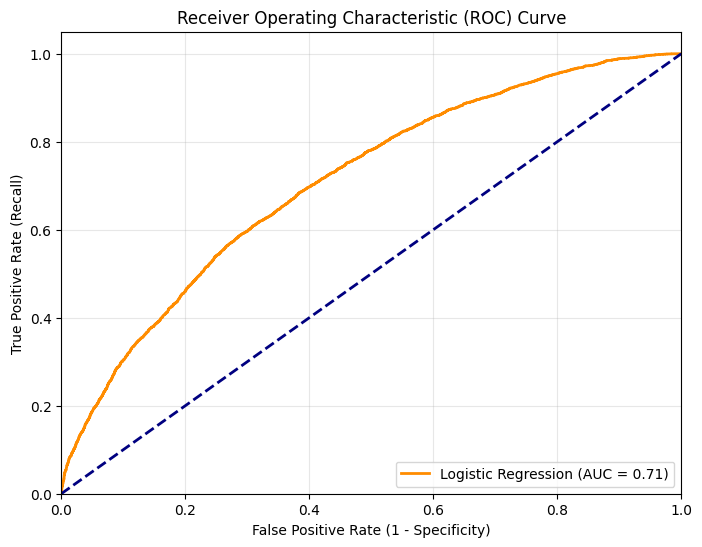

In [604]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay

# 1. Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 2. Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc:.2f})', color='darkorange', lw=2)

# Plot the "Random Guess" diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
#plt.show()

ADDING WEIGHT METRIC TO MODEL 


In [605]:
products.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumery,6,300,20,16,16
1,00088930e925c41fd95ebfe695fd2655,auto,4,1225,55,10,26
2,0009406fd7479715e4bef61dd91f2462,bed bath table,2,300,45,15,35
3,000b8f95fcb9e0096488278317764d19,housewares,3,550,19,24,12
4,000d9be29b5207b54e86aa1b1ac54872,watches gifts,4,250,22,11,15


In [606]:
new = new.merge(fact[['order_id', 'product_id']], on='order_id', how='left')

In [607]:
new=new.merge(products,on='product_id',how='left')
new=new.drop(columns='product_photos_qty')

In [608]:
new['volume']=new['product_length_cm']*new['product_height_cm']*new['product_width_cm']

In [609]:
#new=new.drop(columns=['product_length_cm','product_height_cm','product_width_cm'])
new=new.drop(columns=['product_category_name','delivery_time','product_length_cm','product_width_cm'])



In [610]:
new

,order_id,seller_id,price,delivery_cost,order_purchase_timestamp,is_late,product_category_name_Fashion,product_category_name_Furniture,product_category_name_auto,product_category_name_baby,...,product_category_name_pet shop,product_category_name_sports leisure,product_category_name_stationery,product_category_name_telephony,product_category_name_toys,product_category_name_watches gifts,product_id,product_weight_g,product_height_cm,volume
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017-09-13 08:59:02,0,0,0,0,0,...,0,0,0,0,0,0,4244733e06e7ecb4970a6e2683c13e61,650.0,9.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017-04-26 10:53:06,1,0,0,0,0,...,1,0,0,0,0,0,e5f2d52b802189ee658865ca93d83a8f,30000.0,30.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018-01-14 14:33:31,0,0,1,0,0,...,0,0,0,0,0,0,c777355d18b72b67abbeef9df44fd0fd,3050.0,13.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018-08-08 10:00:35,0,0,0,0,0,...,0,0,0,0,0,0,7634da152a4610f1595efa32f14722fc,200.0,10.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017-02-04 13:57:51,1,0,0,0,0,...,0,0,0,0,0,0,ac6c3623068f30de03045865e4e10089,3750.0,40.0,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112454,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,2018-04-23 13:57:06,1,0,0,0,0,...,0,0,0,0,0,0,4aa6014eceb682077f9dc4bffebc05b0,10150.0,15.0,53400.0
112455,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,350.00,36.53,2018-07-14 10:26:46,0,0,0,0,0,...,0,0,0,0,0,0,32e07fd915822b0765e448c4dd74c828,8950.0,26.0,44460.0
112456,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,2017-10-23 17:07:56,0,0,0,0,0,...,0,1,0,0,0,0,72a30483855e2eafc67aee5dc2560482,967.0,24.0,9576.0
112457,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,2017-08-14 23:02:59,0,0,0,0,0,...,0,0,0,0,0,0,9c422a519119dcad7575db5af1ba540e,100.0,20.0,8000.0


In [611]:
new=new[new['product_weight_g']>=1].copy()

In [612]:
new.head()

,order_id,seller_id,price,delivery_cost,order_purchase_timestamp,is_late,product_category_name_Fashion,product_category_name_Furniture,product_category_name_auto,product_category_name_baby,...,product_category_name_pet shop,product_category_name_sports leisure,product_category_name_stationery,product_category_name_telephony,product_category_name_toys,product_category_name_watches gifts,product_id,product_weight_g,product_height_cm,volume
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.90,13.29,2017-09-13 08:59:02,0,0,0,0,0,...,0,0,0,0,0,0,4244733e06e7ecb4970a6e2683c13e61,650.0,9.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,2017-04-26 10:53:06,1,0,0,0,0,...,1,0,0,0,0,0,e5f2d52b802189ee658865ca93d83a8f,30000.0,30.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2018-01-14 14:33:31,0,0,1,0,0,...,0,0,0,0,0,0,c777355d18b72b67abbeef9df44fd0fd,3050.0,13.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,2018-08-08 10:00:35,0,0,0,0,0,...,0,0,0,0,0,0,7634da152a4610f1595efa32f14722fc,200.0,10.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,199.90,18.14,2017-02-04 13:57:51,1,0,0,0,0,...,0,0,0,0,0,0,ac6c3623068f30de03045865e4e10089,3750.0,40.0,42000.0


In [613]:
x=new.drop(columns=['order_id','is_late','seller_id','order_purchase_timestamp','product_id'])
y=new['is_late']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=67,stratify=y)

columns_to_scale=['delivery_cost','price','product_weight_g','volume']

scaler = StandardScaler()

x_train[columns_to_scale]=scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale]=scaler.transform(x_test[columns_to_scale])

In [614]:
x_train

,price,delivery_cost,product_category_name_Fashion,product_category_name_Furniture,product_category_name_auto,product_category_name_baby,product_category_name_bed bath table,product_category_name_computers accessories,product_category_name_cool stuff,product_category_name_electronics,...,product_category_name_perfumery,product_category_name_pet shop,product_category_name_sports leisure,product_category_name_stationery,product_category_name_telephony,product_category_name_toys,product_category_name_watches gifts,product_weight_g,product_height_cm,volume
4210,-0.416362,0.071838,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.505438,3.0,-0.624384
2071,0.698057,0.188055,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.178771,50.0,1.073929
71890,-0.262165,0.032899,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-0.424943,10.0,-0.544829
35224,-0.447136,-0.443055,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,-0.474045,6.0,-0.512835
55415,-0.106573,-0.300778,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.371280,2.0,-0.640295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59304,-0.340453,-0.360085,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.478607,7.0,-0.602247
70424,-0.171813,-0.240273,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,-0.465191,17.0,-0.443095
82879,0.110895,0.159600,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.782484,10.0,0.036263
45476,-0.361379,-0.162395,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.505438,2.0,-0.640295


In [615]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\nihal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [616]:
y_pred=model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]  # probability of class 1


In [617]:
cm= confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test,y_pred)
roc=roc_auc_score(y_test,y_prob)
rs= recall_score(y_test, y_pred)


accuracy score :0.7439 
roc score: 0.7089
confusion matrix:
[[13675   445]
 [ 4508   710]]
recall score is: 0.13606745879647375



In [618]:
# Nicer formatting for the variable
weight = (f"--- Model Results after adding weight and volume---\n"
        f"Accuracy: {acc * 100:.1f}%\n"
        f"Recall:   {rs * 100:.1f}%\n"
        f"Confusion Matrix:\n{cm}")

In [619]:
print(f"{first}\n{avg_delivery}\n{weight}")

--- first Model Results ---
Accuracy: 73.0%
Recall:   2.5%
Confusion Matrix:
[[13917   203]
 [ 5023   195]]
--- Model Results after avg delivery ---
Accuracy: 74.4%
Recall:   13.6%
Confusion Matrix:
[[13675   445]
 [ 4508   710]]
--- Model Results after adding weight and volume---
Accuracy: 73.6%
Recall:   2.5%
Confusion Matrix:
[[16173   139]
 [ 5719   146]]


In [ ]:
new_threshold=0.4 
y_pred_custom1= (y_prob>= new_threshold).astype(int)


cm2=confusion_matrix(y_test, y_pred_custom1)
rs2= recall_score(y_test, y_pred_custom1)

second_threshold_tweak=(f"\n-----after second threshold tweaking------\nconfusion matrix:\n{cm2}\nrecall score: {rs2}")
print(first_threshold_tweak,second_threshold_tweak)

-----after first threshold tweaking------
confusion matrix:
[[13074  1046]
 [ 3945  1273]]
recall score: 0.2439632042928325 
-----after second threshold tweaking------
confusion matrix:
[[15885   427]
 [ 5489   376]]
recall score: 0.06410912190963342
